In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [10]:
x_s = np.linspace(0, 5, num=100)
n = 5
y_s = np.array([pipeline_v100.simulation(n=n, 
                                         a_x= 1, 
                                         h_z= x, 
                                         delta = 0.2,
                                         #m = 2**(n-1),
                                         m = 2,
                                         DEBUG=True) for x in x_s])

Fidelity F = (0.9564475852505359+3.974523371979444e-05j)

Fidelity F = (0.9562952193455584-4.281567455395554e-05j)

Fidelity F = (0.9562491369026495+4.837200045276561e-05j)

Fidelity F = (0.9559688043408633+9.935311856863754e-06j)

Fidelity F = (0.9559619638216723-0.000231331266660809j)

Fidelity F = (0.9557881817050286+2.427084599903513e-05j)

Fidelity F = (0.9556802142881823+8.837422067024486e-05j)

Fidelity F = (0.9557349403109542+0.00010720264843652504j)

Fidelity F = (0.9558404083706424-0.00021771598168131978j)

Fidelity F = (0.9561206257817944+3.859093867607579e-05j)

Fidelity F = (0.9564408095507482+5.446144477880846e-05j)

Fidelity F = (0.9568285528328611-2.417506081090643e-05j)

Fidelity F = (0.9572998752953908-6.740754994811854e-06j)

Fidelity F = (0.9580430617859771-6.845553845973372e-05j)

Fidelity F = (0.9588614992315514-4.6489208744069124e-05j)

Fidelity F = (0.959769992016848+6.235639577131303e-05j)

Fidelity F = (0.9608405605124531-3.730869493137765e-05j)

Fidelity F = 

In [11]:
y_s[0]

{'fidelity_truncated': 0.5310337847440849,
 'fidelity_generalized': (0.5310337847440849+0j),
 'lower_tqfi': (93.793243051183+0j),
 'upper_tqfi': 93.793243051183,
 'true_fidelity': 0.95644758525053583977,
 'true_qfi': 8.710482949892830355,
 'sub_qfi_bound': 8.780938170993856,
 'super_qfi_bound': 4.5257719171147395,
 'trace_rho': (0.9999999999999998+0j),
 'trace_rho_delta': (1+1.1993097012259144e-18j),
 'purity_rho': (0.5865890947840968+0j),
 'purity_rho_delta': (0.5646871371332943-2.5478751053409354e-18j),
 'rank_rho': 2,
 'rank_rho_delta': 2}

In [12]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
true_qfi = np.array([np.real(x["true_qfi"]) for x in y_s ])
true_fidelity = np.array([np.real(x["true_fidelity"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_generalized"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])


error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

2.96313979105403e-15


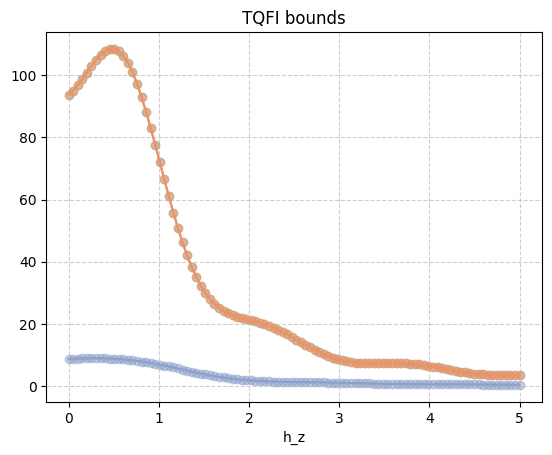

In [13]:
plt.scatter(x_s, lower_tqfi, alpha=0.5)
plt.plot(x_s, lower_tqfi)
plt.scatter(x_s, (upper_tqfi), alpha=0.5)
plt.plot(x_s, (upper_tqfi))
plt.scatter(x_s, (true_qfi), alpha=0.5)
plt.plot(x_s, (true_qfi))
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

In [14]:
print(f"max at h_z = {x_s[np.argmax(lower_tqfi)]}")

max at h_z = 0.45454545454545453


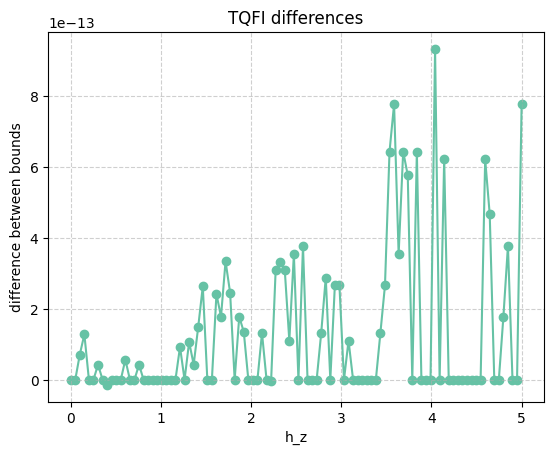

In [15]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

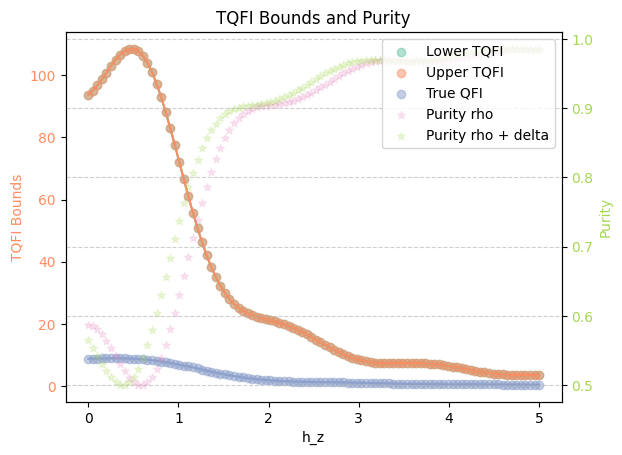

In [16]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, lower_tqfi, alpha=0.5, label="Lower TQFI", color = palette[0])
ax1.plot(x_s, lower_tqfi)
ax1.scatter(x_s, upper_tqfi, alpha=0.5, label="Upper TQFI", color =  palette[1])
ax1.plot(x_s, upper_tqfi)
ax1.scatter(x_s, true_qfi, alpha=0.5, label="True QFI", color = palette[2])
ax1.plot(x_s, true_qfi)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


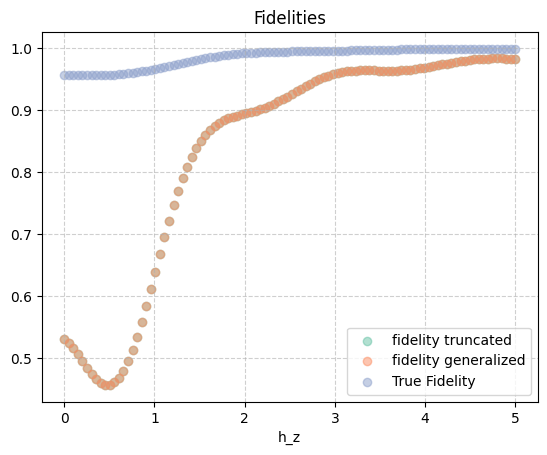

In [17]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, fidelity_truncated, alpha=0.5, label="fidelity truncated", color =  palette[0])
ax1.scatter(x_s, fidelity_generalized, alpha=0.5, label="fidelity generalized", color =  palette[1])
ax1.scatter(x_s, true_fidelity, alpha=0.5, label="True Fidelity", color = palette[2])
ax1.set_xlabel("h_z")
ax1.legend()

plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()


In [18]:
np.min(true_fidelity)

0.9556802142881822698

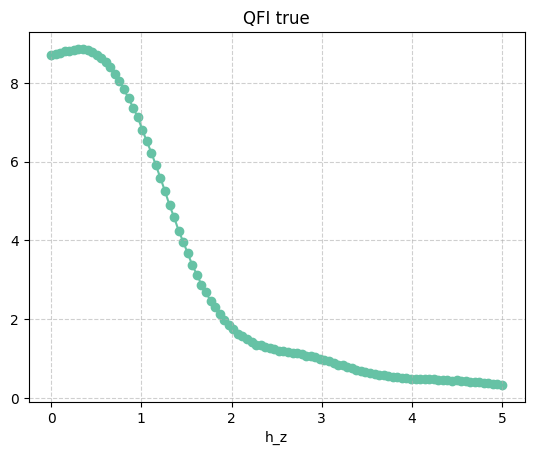

In [19]:
plt.scatter(x_s,true_qfi)
plt.plot(x_s,true_qfi)
plt.xlabel("h_z")
plt.title("QFI true")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


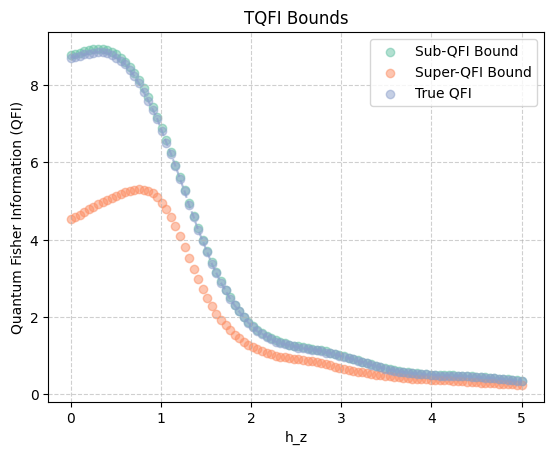

In [20]:
plt.scatter(x_s, sub_qfi_bound, alpha=0.5, label="Sub-QFI Bound", color=palette[0])
plt.scatter(x_s, super_qfi_bound, alpha=0.5, label="Super-QFI Bound", color=palette[1])
plt.scatter(x_s, true_qfi, alpha=0.5, label="True QFI", color=palette[2])
plt.plot(x_s, true_qfi, linestyle="dashed", color=palette[2], alpha=0.7)

plt.title("TQFI Bounds")
plt.xlabel("h_z")
plt.ylabel("Quantum Fisher Information (QFI)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

plt.show()


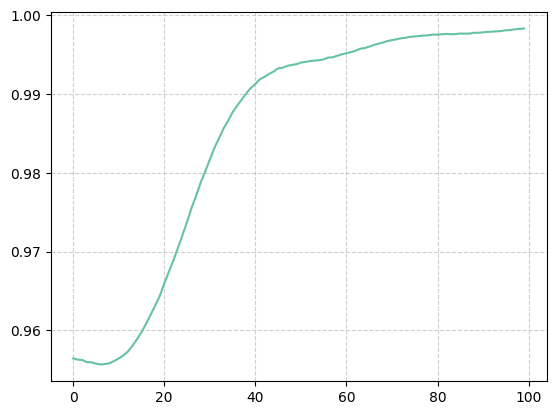

In [21]:
plt.plot(true_fidelity)
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [25]:
(super_qfi_bound - true_qfi) >= 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])